In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import torch
from torch.autograd import Variable
from PIL import Image
from glob import glob
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from tqdm.notebook import tqdm
import zipfile

In [2]:
zip = zipfile.ZipFile('fashion-mnist.zip')
zip.extractall()

In [2]:
train_files = glob('./fashion-mnist/train/*/*.png')
test_files = glob('./fashion-mnist/test/*/*.png')
np.random.shuffle(train_files)
np.random.shuffle(test_files)
import torchvision.transforms as transforms
#--- Transformamos los datos para adaptarlos a la entrada de ResNet 224x224 px
data_transform = transforms.Compose([
                 transforms.Resize((224, 224)),
                 transforms.Grayscale(3), #Dado que MNIST tiene un solo canal, lo cambiamos a 3 para no tener que modificar más capas en el modelo
                 transforms.ToTensor(),
                 transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                 ])
model = torch.hub.load('pytorch/vision', 'vgg16', pretrained=True)
model

Using cache found in C:\Users\Miguel Villalobos/.cache\torch\hub\pytorch_vision_master


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
train_files = train_files[:int(len(train_files)/4)]
test_files = test_files[:int(len(test_files)/4)]

In [4]:
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    Y_train.append( int(train_file.split('\\')[1]) )
    X_train.append(np.array(data_transform(Image.open(train_file))))

X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    Y_test.append( int(test_file.split('\\')[1]) )
    X_test.append( np.array(data_transform(Image.open(test_file))) )

In [5]:

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([13750, 3, 224, 224])

In [7]:
for p in model.parameters():
    p.requires_grad = False
out_dim = 10
model.classifier = torch.nn.Sequential(
    torch.nn.Linear(25088,4096, bias = True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(4096,4096, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(4096,1000, bias = True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5,inplace=False),
    torch.nn.Linear(1000, out_dim)
)


model.load_state_dict(model.state_dict())

model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Iteración: 0 Epoca: 0


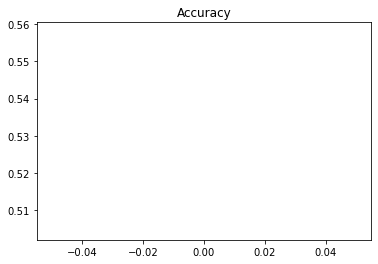

Iteración: 10 Epoca: 0


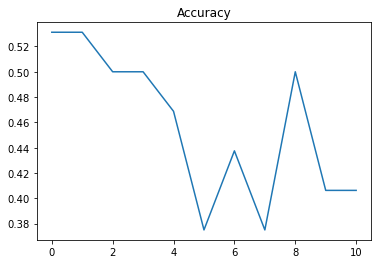

Iteración: 20 Epoca: 0


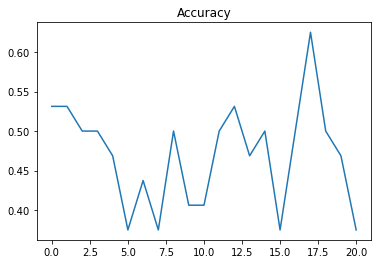

Iteración: 30 Epoca: 0


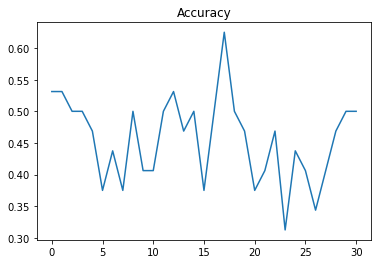

Iteración: 40 Epoca: 0


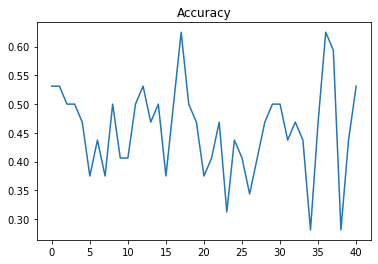

Iteración: 50 Epoca: 0


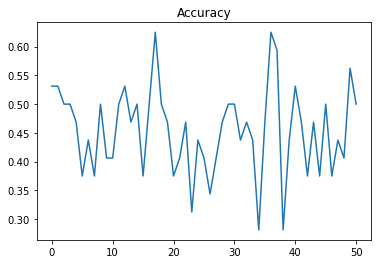

Iteración: 60 Epoca: 0


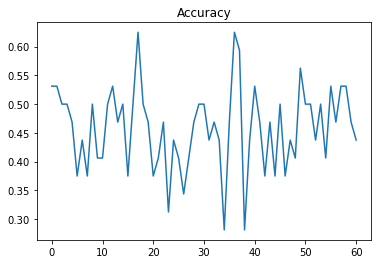

Iteración: 70 Epoca: 0


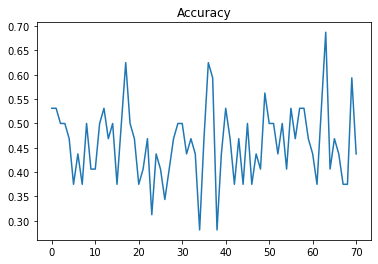

Iteración: 80 Epoca: 0


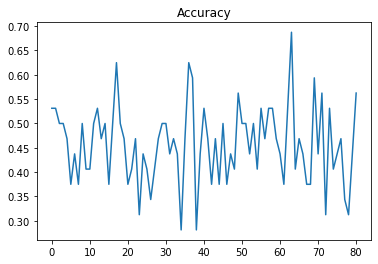

Iteración: 90 Epoca: 0


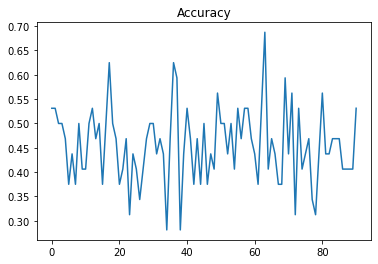

Iteración: 100 Epoca: 0


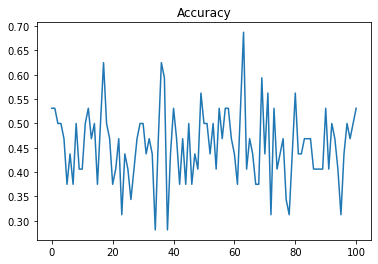

Iteración: 110 Epoca: 0


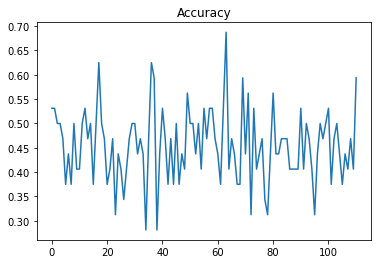

Iteración: 120 Epoca: 0


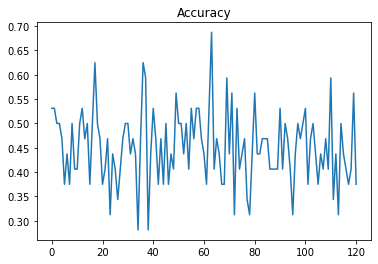

Iteración: 130 Epoca: 0


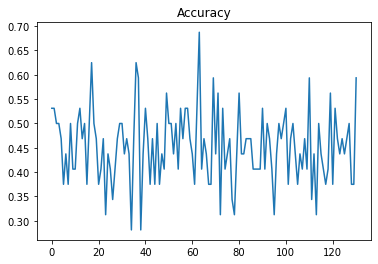

Iteración: 140 Epoca: 0


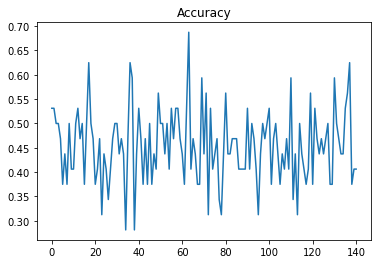

Iteración: 150 Epoca: 0


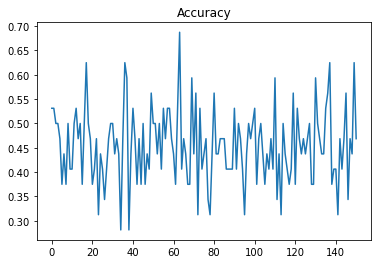

Iteración: 160 Epoca: 0


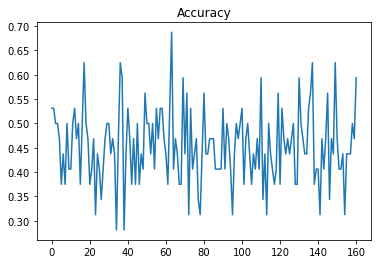

Iteración: 170 Epoca: 0


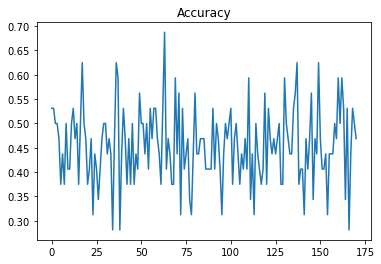

Iteración: 180 Epoca: 0


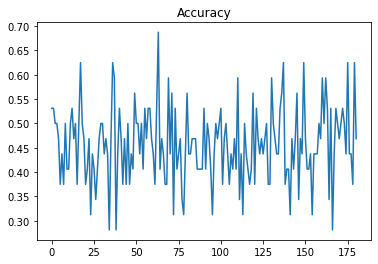

Iteración: 190 Epoca: 0


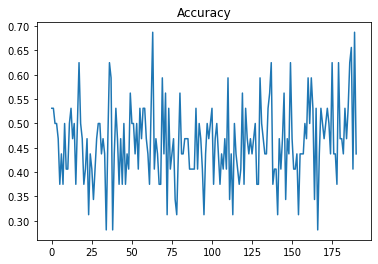

Iteración: 200 Epoca: 0


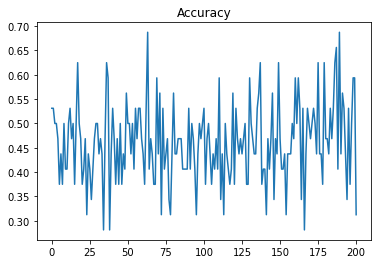

KeyboardInterrupt: 

In [21]:
from sklearn.metrics import accuracy_score
batch_size = 32

train_ds = torch.utils.data.TensorDataset(X_train, Y_train)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.1)
criterion = torch.nn.CrossEntropyLoss()


n_epochs = 5
iter = 0
loss_list=[]
f1_list= []
acc_list = []
for epoch in range(n_epochs):
    for batch_idx, (X_train_batch, Y_train_batch) in enumerate(train_dl):
        
        Y_pred = model(X_train_batch)

        # Calcula el loss
        loss = criterion(Y_pred, Y_train_batch)

        Y_pred = torch.argmax(Y_pred, 1)

        # Calcula el accuracy
        acc = accuracy_score(Y_pred,Y_train_batch)
        f1 = f1_score(Y_pred, Y_train_batch, average='weighted')
        loss_list.append(loss.item())
        acc_list.append(acc)
        f1_list.append(f1)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if iter%10==0:
            print('Iteración: ' +str(iter),'Epoca: '+str(epoch))
            fig = plt.figure()
            plt.title('Accuracy')
            plt.plot(acc_list)
            plt.show()
        iter +=1

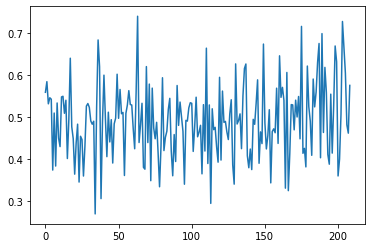

In [23]:
plt.plot(f1_list)

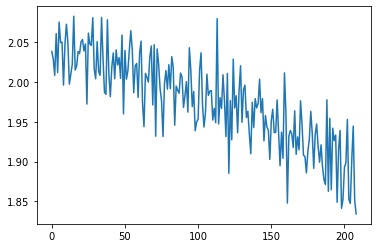

In [24]:
plt.plot(loss_list)